In [1]:
from uproot_io import Events, View
import numpy as np
import random
import csv
import matplotlib
import matplotlib.pyplot as plt

filename = r"C:\Users\red20\Documents\Physics_Project\projects\CheatedRecoFile_1.root"
events = Events(filename)

from variables import *
from ROC import *
from PLOT import *
from Projective_Likelihood import *

import pandas as pd 
file = r"C:\Users\red20\Documents\Physics_Project\data.csv"

In [2]:
def prob_var(tr,sh,bins):
    max_tr = max(tr)
    max_sh = max(sh)
    min_tr = min(tr)
    min_sh = min(sh)
    
    T_prob = np.array([])
    S_prob = np.array([])
    
    #if max_tr > max_sh:
    #    bins_array =np.concatenate(([min_tr],[min_sh + i*((max_tr-min_sh)/bins) for i in range(bins)],[max_tr]))
    #else:
    #    bins_array =np.concatenate(([min_tr],[min_sh + i*((max_tr-min_sh)/bins) for i in range(bins)],[max_tr,max_sh]))

    bins_array =np.concatenate(([min_tr],[min_sh + i*((max_tr-min_sh)/bins) for i in range(bins+1)]))
    tr_pdf = np.histogram(tr,bins=bins_array,density=True)[0]
    sh_pdf = np.histogram(sh,bins=bins_array,density=True)[0]

    for i in range(np.size(bins_array)-1):
        if (tr_pdf[i] == 0):
            T_prob = np.append(T_prob,0)
            S_prob = np.append(S_prob,1)
        elif (sh_pdf[i] == 0):
            T_prob = np.append(T_prob,1)
            S_prob = np.append(S_prob,0)
        else:
            T_prob = np.append(T_prob,tr_pdf[i]/(sh_pdf[i]+tr_pdf[i]))
            S_prob = np.append(S_prob,sh_pdf[i]/(sh_pdf[i]+tr_pdf[i]))

    return T_prob,S_prob,bins_array


In [3]:
def PLA(tr,sh,file):
    bins = 30
    training = 0.75
    tr_training = tr[:int(training*np.size(tr))]
    sh_training = sh[:int(training*np.size(sh))]
    tr_test =  tr[int(training*np.size(tr)):]
    sh_test = sh[int(training*np.size(sh)):]

    L_sig_tracks = np.ones_like(tr_test)
    L_bck_tracks = np.ones_like(tr_test)
    L_sig_showers = np.ones_like(sh_test)
    L_bck_showers = np.ones_like(sh_test)

    data = pd.read_csv(file)
    for col in data.columns:
        var = data[col]
        tr_training_var = [var[i] for i in tr_training]
        sh_training_var = [var[i] for i in sh_training]
        tr_test_var = [var[i] for i in tr_test]
        sh_test_var =[var[i] for i in sh_test]

        T_prob = prob_var(tr_training_var,sh_training_var,bins)[0]
        S_prob = prob_var(tr_training_var,sh_training_var,bins)[1]
        bins_array = prob_var(tr_training_var,sh_training_var,bins)[2]
        tr_test_prob = np.array([])
        sh_test_prob = np.array([])

        for i in tr_test_var:
            if i < bins_array[0]:
                tr_test_prob = np.append(tr_test_prob,1)
                sh_test_prob = np.append(sh_test_prob,0)
            elif i > bins_array[-1]:
                tr_test_prob = np.append(tr_test_prob,0)
                sh_test_prob = np.append(sh_test_prob,1)
            else:
                for j in range(np.size(bins_array)-1):
                    if bins_array[j] < i < bins_array[j+1]:
                        tr_test_prob = np.append(tr_test_prob,T_prob[j])
                        sh_test_prob = np.append(sh_test_prob,S_prob[j])
        
        L_sig_tracks = L_sig_tracks*tr_test_prob
        L_bck_tracks = L_bck_tracks*sh_test_prob

        tr_test_prob = np.array([])
        sh_test_prob = np.array([])

        for i in sh_test_var:
            if i < bins_array[0]:
                tr_test_prob = np.append(tr_test_prob,1)
                sh_test_prob = np.append(sh_test_prob,0)
            elif i > bins_array[-1]:
                tr_test_prob = np.append(tr_test_prob,0)
                sh_test_prob = np.append(sh_test_prob,1)
            else:
                for j in range(np.size(bins_array)-1):
                    if bins_array[j] < i < bins_array[j+1]:
                        tr_test_prob = np.append(tr_test_prob,T_prob[j])
                        sh_test_prob = np.append(sh_test_prob,S_prob[j])

        L_sig_showers = L_sig_showers*tr_test_prob
        L_bck_showers = L_bck_showers*sh_test_prob
        
    MVA_tracks = [L_sig_tracks[i]/(L_sig_tracks[i]+L_bck_tracks[i]) for i in range(np.size(L_sig_tracks))]
    MVA_showers = [L_sig_showers[i]/(L_sig_showers[i]+L_bck_showers[i]) for i in range(np.size(L_sig_showers))]

    return MVA_tracks, MVA_showers

C:\Users\red20\AppData\Local\Temp\ipykernel_11416\1491731223.py:64: RuntimeWarning: invalid value encountered in double_scalars
  MVA_showers = [L_sig_showers[i]/(L_sig_showers[i]+L_bck_showers[i]) for i in range(np.size(L_sig_showers))]


(array([[1.560e+02, 8.700e+01, 1.900e+01, 2.000e+01, 5.000e+00, 1.000e+01,
         6.000e+00, 8.000e+00, 2.000e+00, 7.000e+00, 1.700e+01, 1.000e+00,
         1.100e+01, 3.000e+00, 1.000e+00, 1.000e+00, 1.500e+01, 0.000e+00,
         1.000e+00, 5.800e+01, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00,
         1.000e+00, 0.000e+00, 1.700e+01, 0.000e+00, 0.000e+00, 3.300e+01,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 4.000e+00, 1.050e+02, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+01,
         0.000e+00, 1.100e+01, 1.300e+01, 2.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 2.200e+01, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
         4.000e+00, 0.000e+00, 0.000e+00, 3.400e+01, 0.000e+00, 0.000e+00,
         0.000e+00, 4.000e+00, 1.000e+00, 3.400e+01, 0.000e+00, 0.000e+00,
         3.000e+00, 0.000

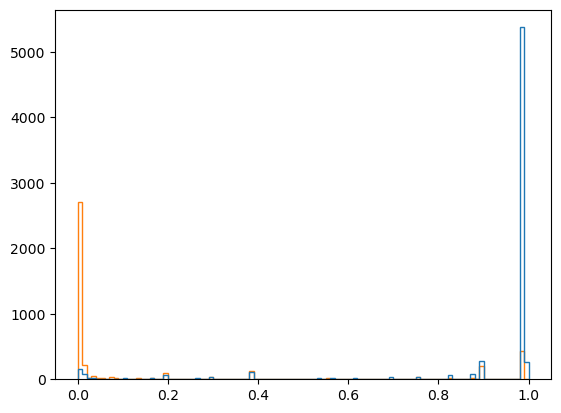

In [4]:
tracks = tracks_idx(events,7,0.8)
showers = showers_idx(events,7,0.8)

L_tr, L_sh = PLA(tracks,showers,file)

plt.hist((L_tr,L_sh),100,histtype='step')

Best divide is at 0.39
Best efficiency is 0.8518147684605757 Best purity is 0.8205931999035447


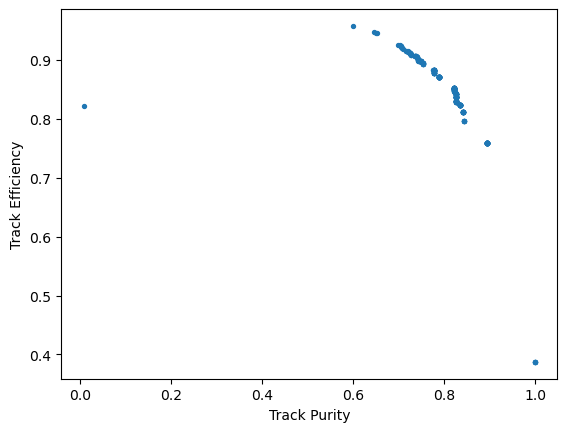

In [5]:
plot_ROC(L_sh,L_tr)

In [6]:

a = MVAconf(tracks,showers,0.39,file)
print(a)



[[[0.9241230160184744, 0.7778849632219944], [0.0758769839815256, 0.22211503677800554]]]


c:\Users\red20\Documents\GitHub\dune_classification\Projective_Likelihood.py:99: RuntimeWarning: invalid value encountered in double_scalars
  MVA_showers = [L_sig_showers[i]/(L_sig_showers[i]+L_bck_showers[i]) for i in range(np.size(L_sig_showers))]


(array([2.858e+03, 3.060e+02, 4.000e+01, 6.600e+01, 1.900e+01, 2.300e+01,
        8.000e+00, 3.800e+01, 1.600e+01, 1.400e+01, 2.500e+01, 1.000e+00,
        1.800e+01, 2.000e+01, 1.000e+00, 5.000e+00, 3.700e+01, 0.000e+00,
        1.000e+00, 1.530e+02, 0.000e+00, 0.000e+00, 1.000e+00, 5.000e+00,
        1.000e+00, 0.000e+00, 2.100e+01, 0.000e+00, 0.000e+00, 7.100e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.100e+01, 2.360e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.100e+01,
        0.000e+00, 2.600e+01, 1.400e+01, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.400e+01, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        6.000e+00, 0.000e+00, 0.000e+00, 3.800e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 4.000e+00, 1.000e+00, 7.000e+01, 0.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 0.000e+0

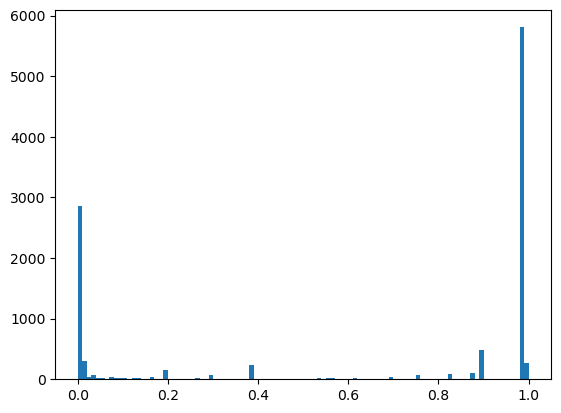

In [8]:
A,B = PL(tracks,showers,file) 
C = np.concatenate((A,B))

plt.hist(C,100)

In [17]:
p = pd.read_csv(file)
w = p["rms_w"]
v = p["rms_v"]

d = np.concatenate((tracks,showers))
w = [w[i] for i in d]
v = [v[i] for i in d]

a = np.dstack((w,v))[0]

np.cov(a,rowvar = False)


array([[25.11764274, 23.42105117],
       [23.42105117, 32.805648  ]])